## MFE System!
Part of FYP Masters project by Raihaan Usman

In [1]:
from backend.solver import MFE
from backend import CRCM, QRCM

import numpy as np

#### Configuring the MFE solver (9DoF)

[  0 400 800 800]


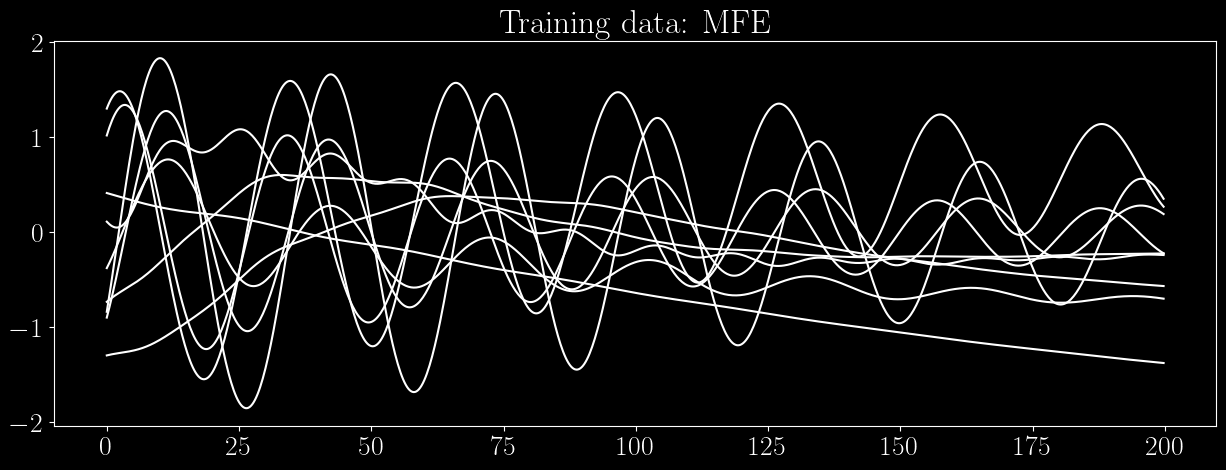

In [2]:
# Data generation parameters
dt = 0.25

mfe_params = {
    "L_x": 4 * np.pi,
    "L_y": 2,
    "L_z": 2 * np.pi,
    "Re" : 400,
    "k_l": 0.48,
    "k_e": 0.1
}

# Define N for washout, training, validation and testing
N_transient     = 0
N_washout       = 100
N_train         = 200
N_test          = 200
N_sets          = (np.array([N_transient, N_washout, N_train, N_test]) / dt).astype(int)
print(N_sets)
u0 = [1, 0, 0.07066, -0.07076, 0, 0, 0, 0, 0]

# Instantiate the solver object with prescribed initial state
mfe9 = MFE(params=mfe_params, dt=dt, N_sets=N_sets, u0=u0)
mfe9.generate()
mfe9.plot()

#### CRCM for Lorenz system

In [5]:
# Initialise the ESN
crcm = CRCM(solver=mfe9,
            N_units=7040,
            connectivity=49,
            eps=0.7209,
            tik=2.906e-4,
            # sigmoid
            activation=lambda x: 1/(1+np.exp(-x)),
            seed=0)
# Train the ESN with the training data
crcm.train()
crcm.forward()

Closed Loop: 100%|██████████| 799/799 [00:01<00:00, 752.07it/s]

MSE: 61971.01967956333


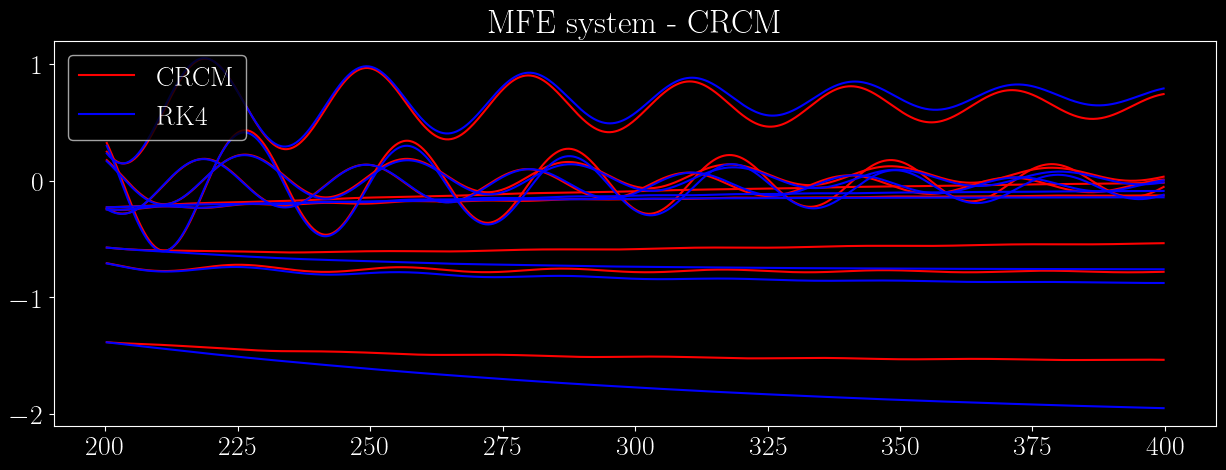

In [6]:
crcm.plot_results(mfe9.Y["Test"])

#### QRCM for Lorenz system

In [4]:
# Instantiate the QRCM object
qrcm = QRCM(solver  = mfe9,
            qubits  = 4,
            eps     = 5e-2,
            tik     = 1e-4,
            plot    = True)

# Train the QRCM with the training data
qrcm.train()
qrcm.forward()

Washout:  94%|█████████▍| 375/400 [00:17<00:01, 21.64it/s]


KeyboardInterrupt: 